In [1]:
# Heart Attack Risk Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
heart_data = pd.read_csv("C:/Users/madhu/Downloads/heart-attack-risk-analysis/train.csv")

In [3]:
heart_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [4]:
heart_data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [5]:
heart_data.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [6]:
heart_data[['Systolic','Diastolic']] = heart_data['Blood Pressure'].str.split("/",expand=True)

In [7]:
heart_data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [8]:
heart_data['Systolic'] = heart_data['Systolic'].astype('int')
heart_data['Diastolic'] = heart_data['Diastolic'].astype('int')

In [9]:
heart_data['Blood_Pressure_Type'] = ''
for index,row in heart_data.iterrows():
    if row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        heart_data.at[index,'Blood_Pressure_Type'] = 'High_BP'
    else:
        heart_data.at[index,'Blood_Pressure_Type'] = 'Low_BP'

In [10]:
heart_data.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [11]:
heart_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Blood_Pressure_Type
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,South America,Southern Hemisphere,1,129,90,High_BP
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105,High_BP
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,Asia,Northern Hemisphere,0,161,109,High_BP
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,591,0,9,Spain,Europe,Southern Hemisphere,1,120,62,Low_BP
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,145,2,5,Germany,Europe,Northern Hemisphere,1,153,110,High_BP


In [12]:
# No duplicates
any(heart_data.duplicated())

False

In [13]:
# No missing values
heart_data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic                           0
D

# Univariate Plots

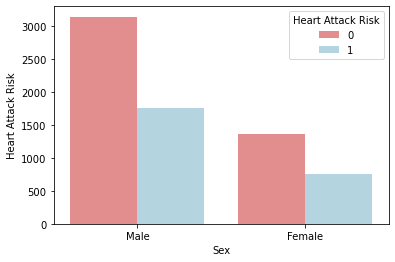

In [14]:
sns.countplot(x='Sex',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.xlabel('Sex')
plt.ylabel('Heart Attack Risk')
plt.show()

In [15]:
heart_data['Sex'].value_counts()['Male']

4891

In [16]:
#Percentage of Male with no heart attack risk
(3000/4891)*100

61.337149867102845

In [17]:
heart_data['Sex'].value_counts()['Female']

2119

In [18]:
# Percentage of Female with no heart attack risk
(1450/2119)*100

68.4285040113261

Comparing : males have higher risk of heart attack risk compared to female

In [19]:
bins = [1,10,20,30,40,50,60,70,80,90,100,110]
heart_data['AgeGroup'] = pd.cut(heart_data['Age'], bins=bins, labels=[f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])])

In [20]:
heart_data['AgeGroup']

0       30-40
1       50-60
2       10-20
3       40-50
4       80-90
        ...  
7005    20-30
7006    80-90
7007    50-60
7008    40-50
7009    60-70
Name: AgeGroup, Length: 7010, dtype: category
Categories (11, object): ['1-10' < '10-20' < '20-30' < '30-40' ... '70-80' < '80-90' < '90-100' < '100-110']

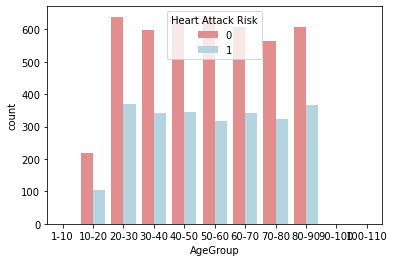

In [21]:
sns.countplot(x='AgeGroup',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

From the following graph we can see that age by itself is not a significant feature for heart attack risk

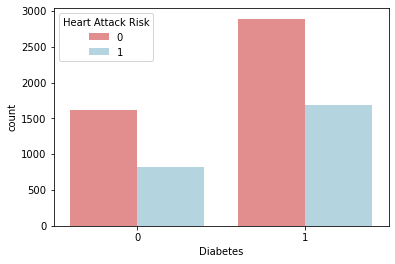

In [22]:
sns.countplot(x='Diabetes',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

# not significant by itself

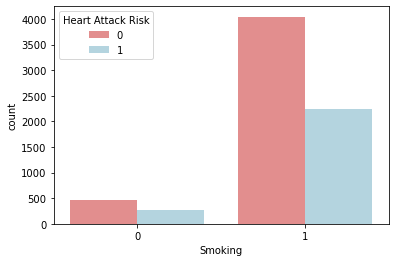

In [23]:
sns.countplot(x='Smoking',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

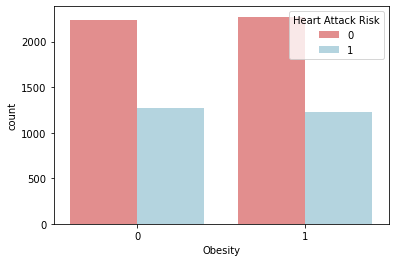

In [24]:
sns.countplot(x='Obesity',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

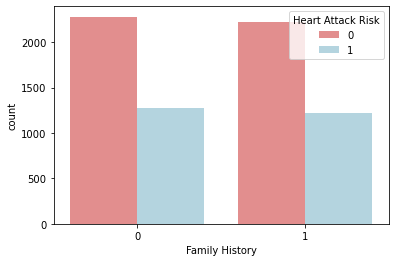

In [25]:
sns.countplot(x='Family History',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

By itself : smoking, diabetes, family history and obesity, blood pressure does not have significnant effect

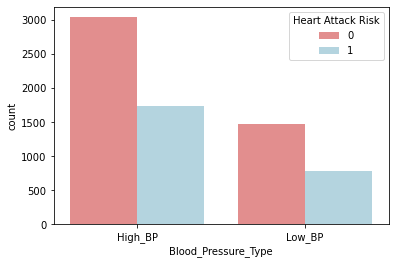

In [26]:
sns.countplot(x='Blood_Pressure_Type',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

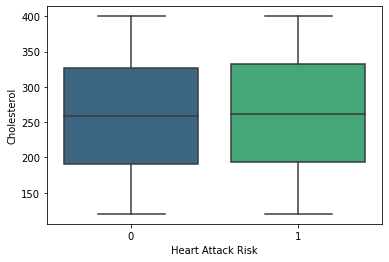

In [27]:
sns.boxplot(x='Heart Attack Risk',y='Cholesterol', data=heart_data,palette='viridis')
plt.show()

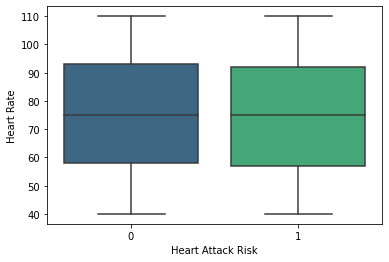

In [28]:
sns.boxplot(x='Heart Attack Risk',y='Heart Rate', data=heart_data,palette='viridis')
plt.show()

In [29]:
heart_data['Alcohol Consumption'].unique()

array([1, 0], dtype=int64)

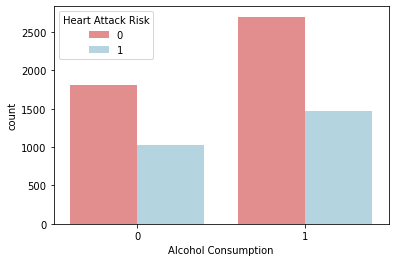

In [30]:
sns.countplot(x='Alcohol Consumption',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

<AxesSubplot:xlabel='Heart Attack Risk', ylabel='Exercise Hours Per Week'>

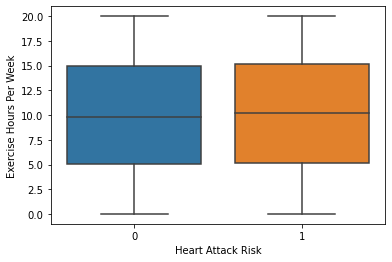

In [31]:
sns.boxplot(x='Heart Attack Risk',y='Exercise Hours Per Week',data=heart_data)

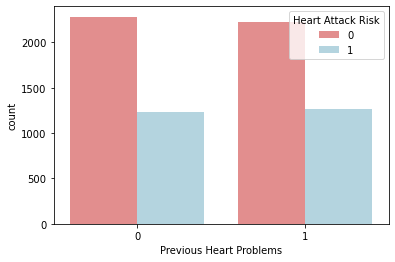

In [32]:
sns.countplot(x='Previous Heart Problems',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

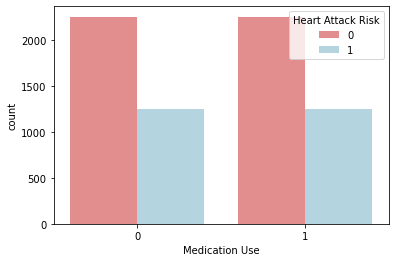

In [33]:
sns.countplot(x='Medication Use',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

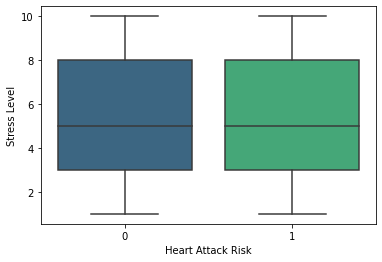

In [34]:
sns.boxplot(x='Heart Attack Risk',y='Stress Level', data=heart_data,palette='viridis')
plt.show()

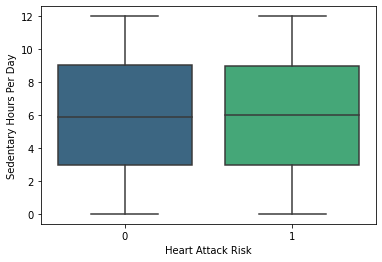

In [35]:
sns.boxplot(x='Heart Attack Risk',y='Sedentary Hours Per Day', data=heart_data,palette='viridis')
plt.show()

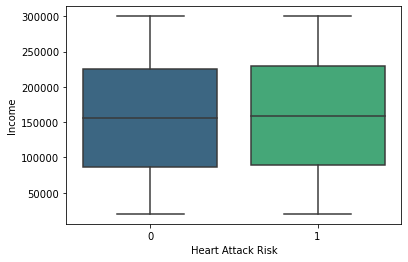

In [36]:
sns.boxplot(x='Heart Attack Risk',y='Income', data=heart_data,palette='viridis')
plt.show()

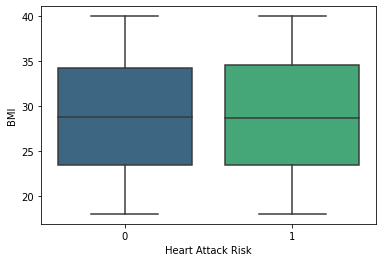

In [37]:
sns.boxplot(x='Heart Attack Risk',y='BMI', data=heart_data,palette='viridis')
plt.show()

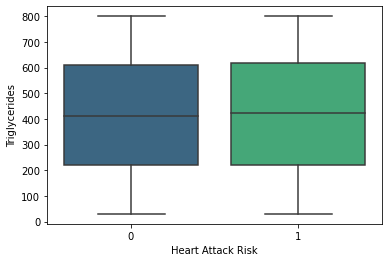

In [38]:
sns.boxplot(x='Heart Attack Risk',y='Triglycerides', data=heart_data,palette='viridis')
plt.show()

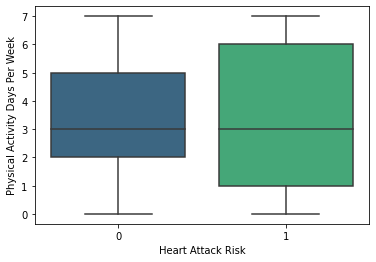

In [39]:
sns.boxplot(x='Heart Attack Risk',y='Physical Activity Days Per Week', data=heart_data,palette='viridis')
plt.show()

# over exercising or under exercising may be a cause

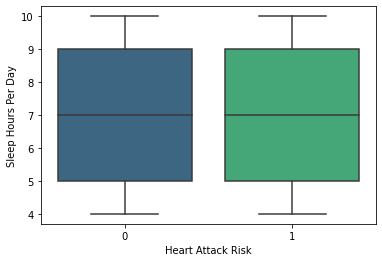

In [40]:
sns.boxplot(x='Heart Attack Risk',y='Sleep Hours Per Day', data=heart_data,palette='viridis')
plt.show()

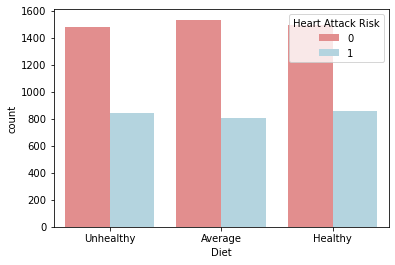

In [41]:
sns.countplot(x='Diet',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

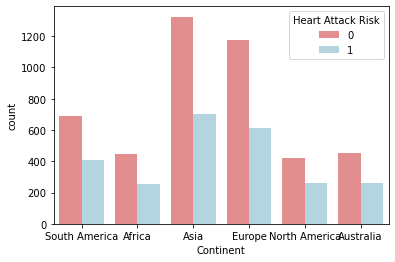

In [42]:
sns.countplot(x='Continent',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

North America and Africa have higher heart attack risk percentage compared to other continents

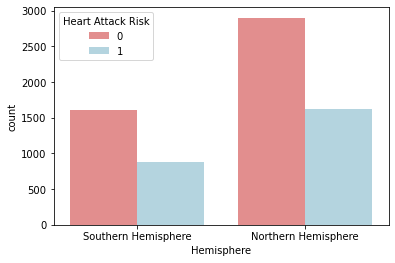

In [43]:
sns.countplot(x='Hemisphere',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

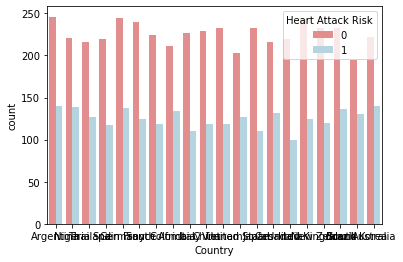

In [44]:
sns.countplot(x='Country',hue='Heart Attack Risk',data=heart_data,palette=['lightcoral','lightblue'])
plt.show()

From Univariate : the conclusion we observed, male is more prone to heart attack risk
                   overexercising or under exercising may be a cause
                   north america and africa have higher risk for heart attack than other continents

## Bivariate Plot

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

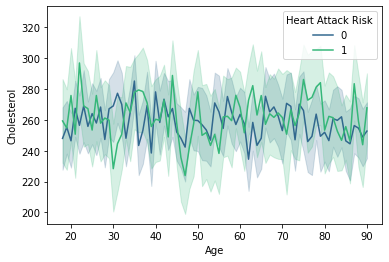

In [45]:
sns.lineplot(x='Age',y='Cholesterol',hue='Heart Attack Risk',data = heart_data, palette ='viridis')


<AxesSubplot:xlabel='Age', ylabel='Heart Rate'>

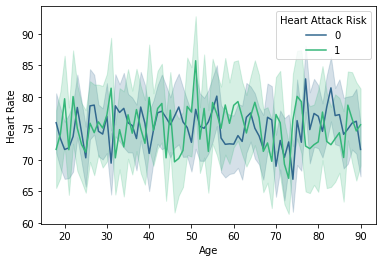

In [46]:
sns.lineplot(x='Age',y='Heart Rate',hue='Heart Attack Risk',data = heart_data, palette ='viridis')

<AxesSubplot:xlabel='Cholesterol', ylabel='Heart Rate'>

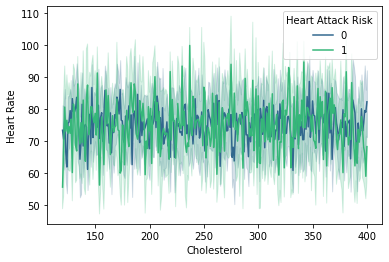

In [47]:
sns.lineplot(x='Cholesterol',y='Heart Rate',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='Exercise Hours Per Week'>

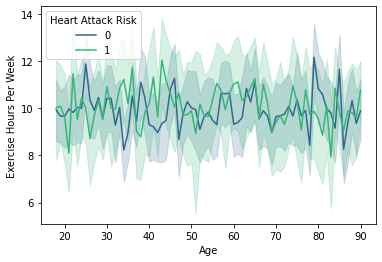

In [48]:
sns.lineplot(x='Age',y='Exercise Hours Per Week',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='Stress Level'>

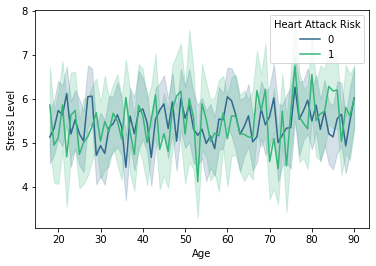

In [49]:
sns.lineplot(x='Age',y='Stress Level',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='Sedentary Hours Per Day'>

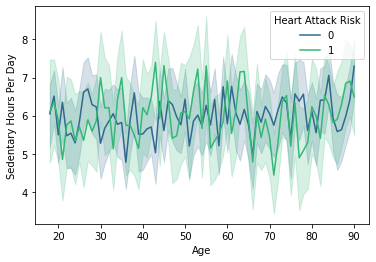

In [50]:
sns.lineplot(x='Age',y='Sedentary Hours Per Day',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='BMI'>

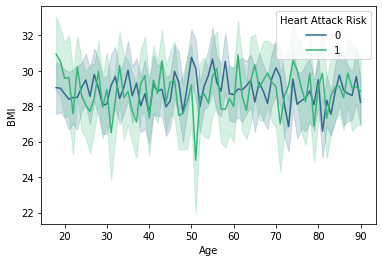

In [51]:
sns.lineplot(x='Age',y='BMI',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='Income'>

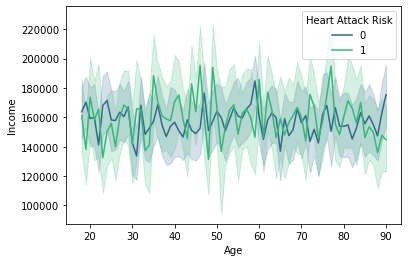

In [52]:
sns.lineplot(x='Age',y='Income',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')


<AxesSubplot:xlabel='Age', ylabel='Physical Activity Days Per Week'>

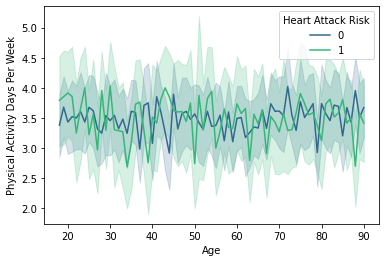

In [53]:
sns.lineplot(x='Age',y='Physical Activity Days Per Week',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')

<AxesSubplot:xlabel='Age', ylabel='Sleep Hours Per Day'>

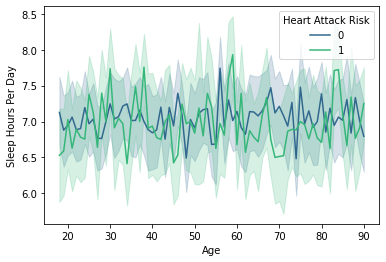

In [54]:
sns.lineplot(x='Age',y='Sleep Hours Per Day',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')

<AxesSubplot:xlabel='Age', ylabel='Triglycerides'>

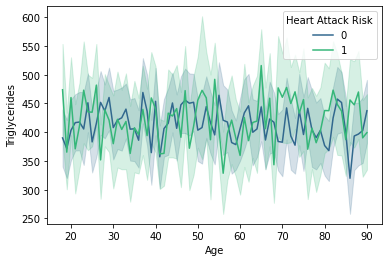

In [55]:
sns.lineplot(x='Age',y='Triglycerides',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')

<AxesSubplot:xlabel='Cholesterol', ylabel='Triglycerides'>

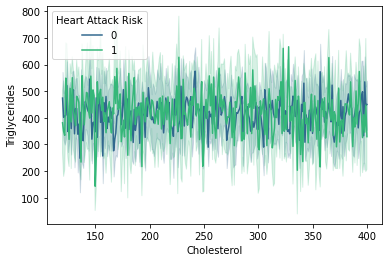

In [56]:
sns.lineplot(x='Cholesterol',y='Triglycerides',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')

<AxesSubplot:xlabel='Cholesterol', ylabel='BMI'>

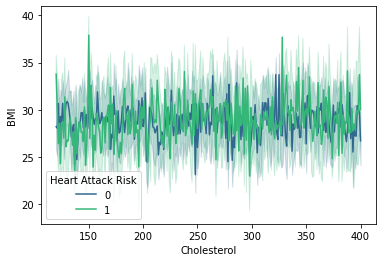

In [57]:
sns.lineplot(x='Cholesterol',y='BMI',hue='Heart Attack Risk',data= heart_data,palette = 'viridis')

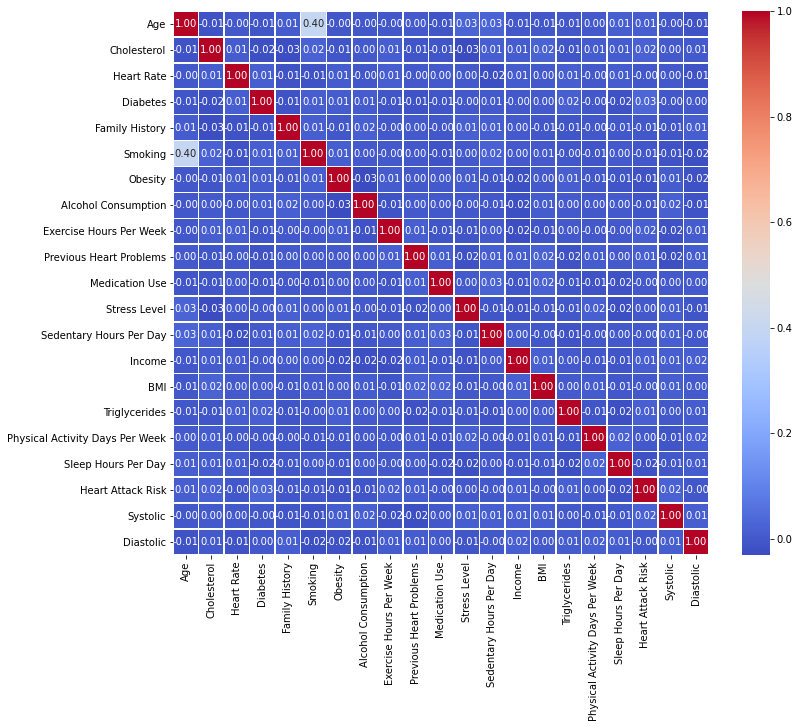

In [58]:
corr_matrix = heart_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [59]:
heart_data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic', 'Diastolic',
       'Blood_Pressure_Type', 'AgeGroup'],
      dtype='object')

In [60]:
heart_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Blood_Pressure_Type,AgeGroup
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,6,7,Argentina,South America,Southern Hemisphere,1,129,90,High_BP,30-40
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105,High_BP,50-60
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,2,10,Thailand,Asia,Northern Hemisphere,0,161,109,High_BP,10-20
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,0,9,Spain,Europe,Southern Hemisphere,1,120,62,Low_BP,40-50
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,2,5,Germany,Europe,Northern Hemisphere,1,153,110,High_BP,80-90


In [61]:
heart_data = heart_data.drop(['Patient ID','Blood Pressure','Hemisphere','AgeGroup','Country'],axis=1)

In [62]:
heart_data = pd.get_dummies(heart_data, columns=['Continent'],prefix='Continent')

In [63]:
heart_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic', 'Diastolic', 'Blood_Pressure_Type',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America'],
      dtype='object')

In [64]:
heart_data = pd.get_dummies(heart_data,columns=['Diet'],prefix='Diet')

In [65]:
heart_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic', 'Diastolic', 'Blood_Pressure_Type',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy'],
      dtype='object')

In [66]:
# High BP - 0 and low BP - 1
encoder = LabelEncoder()
heart_data['Blood_Pressure_Type'] = encoder.fit_transform(heart_data['Blood_Pressure_Type'])

In [67]:
heart_data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Blood_Pressure_Type,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,33,Male,200,48,0,1,1,1,1,7.807690,...,0,0,0,0,0,0,1,0,0,1
1,56,Female,262,46,1,0,1,0,0,17.297628,...,0,1,0,0,0,0,0,1,0,0
2,19,Female,140,54,0,1,0,0,1,8.695288,...,0,0,1,0,0,0,0,1,0,0
3,50,Female,163,53,0,1,1,1,1,10.161587,...,1,0,0,0,1,0,0,0,1,0
4,89,Female,144,92,1,0,1,0,1,16.436787,...,0,0,0,0,1,0,0,0,1,0


In [68]:
heart_data['Sex'] = encoder.fit_transform(heart_data['Sex'])

In [69]:
heart_data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Blood_Pressure_Type,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,33,1,200,48,0,1,1,1,1,7.807690,...,0,0,0,0,0,0,1,0,0,1
1,56,0,262,46,1,0,1,0,0,17.297628,...,0,1,0,0,0,0,0,1,0,0
2,19,0,140,54,0,1,0,0,1,8.695288,...,0,0,1,0,0,0,0,1,0,0
3,50,0,163,53,0,1,1,1,1,10.161587,...,1,0,0,0,1,0,0,0,1,0
4,89,0,144,92,1,0,1,0,1,16.436787,...,0,0,0,0,1,0,0,0,1,0


In [70]:
X = heart_data.drop('Heart Attack Risk', axis=1)

In [71]:
y = heart_data['Heart Attack Risk']

In [72]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
model = LogisticRegression()

In [74]:
model.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test,y_pred)

In [77]:
print(accuracy)

0.6426533523537803


In [78]:
heart_data_test = pd.read_csv('C:/Users/madhu/Downloads/heart-attack-risk-analysis/test.csv')

In [79]:
heart_data_test[['Systolic','Diastolic']] = heart_data_test['Blood Pressure'].str.split("/",expand=True)

In [80]:
heart_data_test['Systolic'] = heart_data_test['Systolic'].astype('int')
heart_data_test['Diastolic'] = heart_data_test['Diastolic'].astype('int')

In [81]:
heart_data_test['Blood_Pressure_Type'] = ''
for index,row in heart_data_test.iterrows():
    if row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        heart_data_test.at[index,'Blood_Pressure_Type'] = 'High_BP'
    else:
        heart_data_test.at[index,'Blood_Pressure_Type'] = 'Low_BP'

In [82]:
any(heart_data_test.duplicated())

False

In [83]:
heart_data_test.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Systolic                           0
Diastolic                          0
B

In [84]:
heart_data_test = heart_data_test.drop(['Patient ID','Blood Pressure','Hemisphere','Country'],axis=1)

In [85]:
heart_data_test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Systolic,Diastolic,Blood_Pressure_Type
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,South America,158,88,High_BP
1,84,Male,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,Asia,131,68,Low_BP
2,60,Male,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,North America,160,98,High_BP
3,45,Male,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,Europe,130,84,Low_BP
4,36,Male,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,North America,161,90,High_BP


In [86]:
heart_data_test = pd.get_dummies(heart_data_test,columns=['Diet'],prefix='Diet')

In [87]:
heart_data_test = pd.get_dummies(heart_data_test, columns=['Continent'],prefix='Continent')

In [88]:
encoder = LabelEncoder()
heart_data_test['Blood_Pressure_Type'] = encoder.fit_transform(heart_data_test['Blood_Pressure_Type'])

In [89]:
heart_data_test['Sex'] = encoder.fit_transform(heart_data_test['Sex'])

In [90]:
heart_data_test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Blood_Pressure_Type,Diet_Average,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,1,0,0,0,0,0,0,0,1
1,84,1,220,107,0,0,1,1,1,3.427929,...,1,1,0,0,0,1,0,0,0,0
2,60,1,145,71,1,0,1,0,1,1.892559,...,0,0,1,0,0,0,0,0,1,0
3,45,1,294,66,0,0,1,1,1,13.693785,...,1,0,1,0,0,0,0,1,0,0
4,36,1,133,97,1,0,1,1,1,3.618009,...,0,0,1,0,0,0,0,0,1,0


In [91]:
heart_data_test.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic',
       'Diastolic', 'Blood_Pressure_Type', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Continent_Africa', 'Continent_Asia',
       'Continent_Australia', 'Continent_Europe', 'Continent_North America',
       'Continent_South America'],
      dtype='object')

In [92]:
y_pred = model.predict(heart_data_test)

In [93]:
heart_data_test['Heart Attack Risk'] = y_pred

In [94]:
heart_data_test.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic',
       'Diastolic', 'Blood_Pressure_Type', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Continent_Africa', 'Continent_Asia',
       'Continent_Australia', 'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Heart Attack Risk'],
      dtype='object')

In [95]:
heart = pd.read_csv("C:/Users/madhu/Downloads/heart-attack-risk-analysis/test.csv")

In [96]:
heart_data_test['Patient ID'] = heart['Patient ID']

In [97]:
heart_data_test.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic',
       'Diastolic', 'Blood_Pressure_Type', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Continent_Africa', 'Continent_Asia',
       'Continent_Australia', 'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Heart Attack Risk', 'Patient ID'],
      dtype='object')

In [98]:
test_data = heart_data_test[['Patient ID','Heart Attack Risk']]

In [99]:
test_data.columns

Index(['Patient ID', 'Heart Attack Risk'], dtype='object')

In [102]:
test_data.to_csv('C:/Users/madhu/Downloads/heart-attack-risk-analysis/test_results_1.csv', index=False)